In [1]:
%pip install -Uqq fastbook

import fastbook
fastbook.setup_book()

from fastbook import *

from fastai.vision.all import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 21.8 MB/s eta 0:00:00
Mounted at /content/gdrive


In [3]:
path=untar_data(URLs.CAMVID_TINY)
path.ls()

(#3) [Path('/root/.fastai/data/camvid_tiny/images'),Path('/root/.fastai/data/camvid_tiny/codes.txt'),Path('/root/.fastai/data/camvid_tiny/labels')]

In [4]:
codes=np.loadtxt(path/'codes.txt',dtype=str)

In [5]:
codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car', 'CartLuggagePram', 'Child', 'Column_Pole', 'Fence', 'LaneMkgsDriv', 'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter',
       'OtherMoving', 'ParkingBlock', 'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk', 'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone', 'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel',
       'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [6]:
fnames=get_image_files(path/'images')

In [7]:
fnames

(#100) [Path('/root/.fastai/data/camvid_tiny/images/0006R0_f00960.png'),Path('/root/.fastai/data/camvid_tiny/images/Seq05VD_f04980.png'),Path('/root/.fastai/data/camvid_tiny/images/Seq05VD_f00480.png'),Path('/root/.fastai/data/camvid_tiny/images/0016E5_05190.png'),Path('/root/.fastai/data/camvid_tiny/images/Seq05VD_f01320.png'),Path('/root/.fastai/data/camvid_tiny/images/0001TP_008760.png'),Path('/root/.fastai/data/camvid_tiny/images/0001TP_007500.png'),Path('/root/.fastai/data/camvid_tiny/images/Seq05VD_f01080.png'),Path('/root/.fastai/data/camvid_tiny/images/0016E5_08155.png'),Path('/root/.fastai/data/camvid_tiny/images/Seq05VD_f03060.png')...]

In [9]:
##Trying to establish relationbetween labels and images
(path/'labels').ls()

(#100) [Path('/root/.fastai/data/camvid_tiny/labels/0016E5_08137_P.png'),Path('/root/.fastai/data/camvid_tiny/labels/0016E5_08340_P.png'),Path('/root/.fastai/data/camvid_tiny/labels/0016E5_08141_P.png'),Path('/root/.fastai/data/camvid_tiny/labels/0016E5_08550_P.png'),Path('/root/.fastai/data/camvid_tiny/labels/0001TP_007860_P.png'),Path('/root/.fastai/data/camvid_tiny/labels/0006R0_f02490_P.png'),Path('/root/.fastai/data/camvid_tiny/labels/Seq05VD_f01080_P.png'),Path('/root/.fastai/data/camvid_tiny/labels/0001TP_008940_P.png'),Path('/root/.fastai/data/camvid_tiny/labels/Seq05VD_f04530_P.png'),Path('/root/.fastai/data/camvid_tiny/labels/0001TP_006750_P.png')...]

In [10]:
 def label_func(fn): return path/"labels"/f"{fn.stem}_P{fn.suffix}"

In [11]:
dls=SegmentationDataLoaders.from_label_func(
  path,fnames=fnames,label_func=label_func,codes=codes
)

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


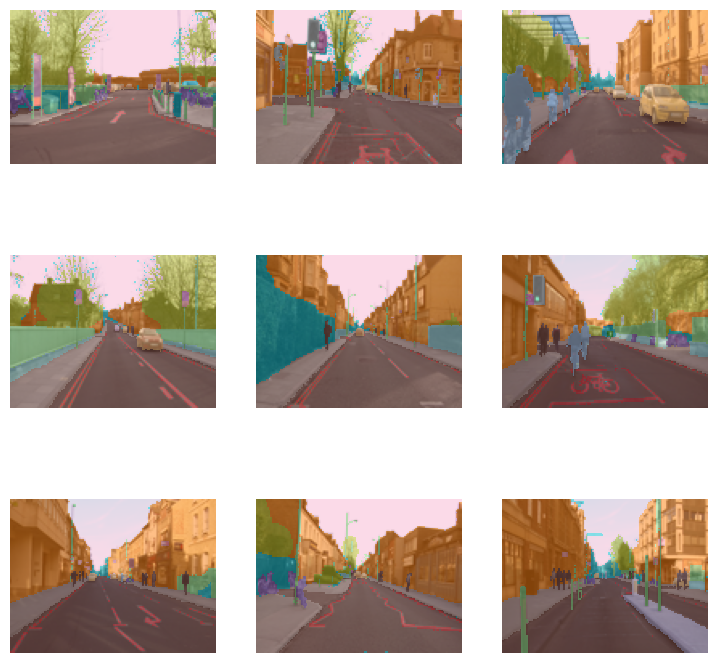

In [12]:
dls.show_batch(max_n=9)

In [13]:
learn=unet_learner(dls,resnet34)

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 49.7MB/s]


In [15]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,time
0,3.128711,2.907965,01:02


epoch,train_loss,valid_loss,time
0,2.780424,2.507562,01:05


In [25]:
img=learn.predict('/content/download (1).jpg')

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


<Axes: title={'center': 'Predicted Segmentation Mask'}>

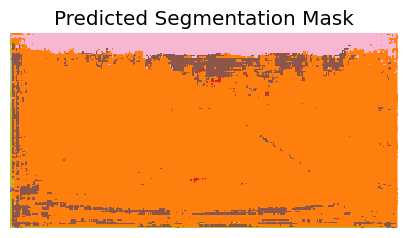

In [26]:
img[0].show(title="Predicted Segmentation Mask", figsize=(5, 5), alpha=1)


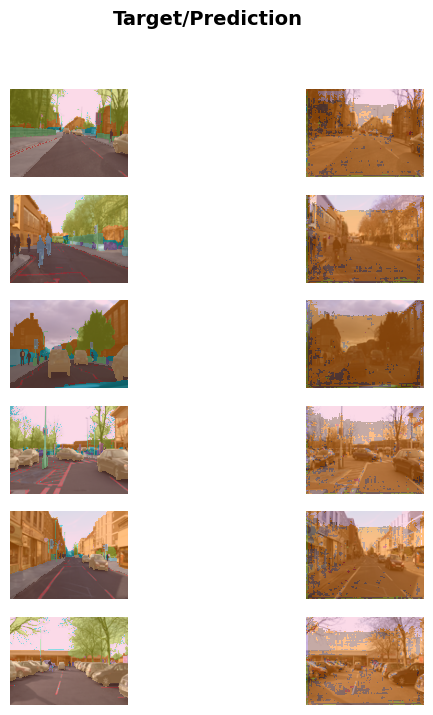

In [27]:
learn.show_results(max_n=6, figsize=(7,8))

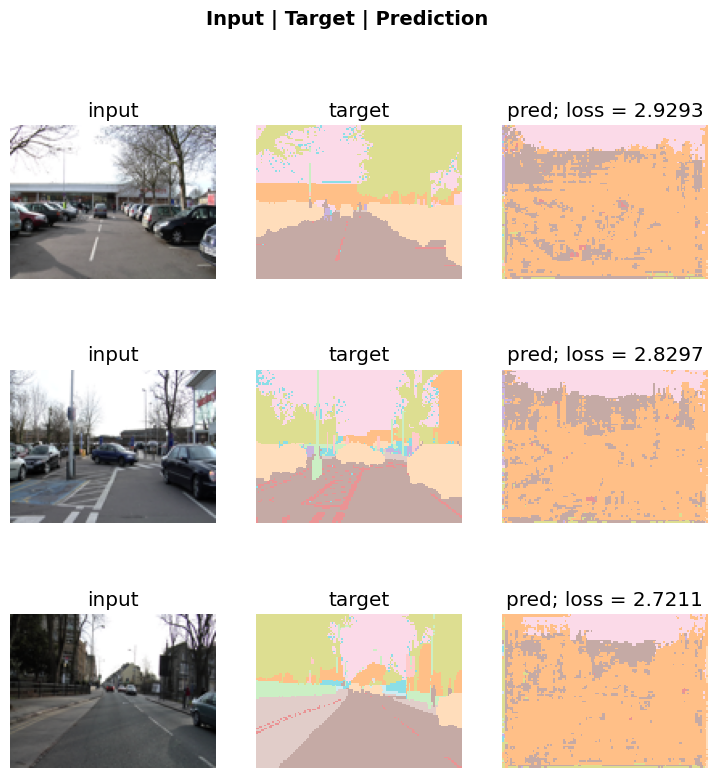

In [28]:
interp = SegmentationInterpretation.from_learner(learn)
interp.plot_top_losses(k=3)